#Case Study: Supply and Sale Management with Business Intelligence

  ------------------------------------------------------------------------------

Name: Mohammad Shihab Uddin

ID: 164138

Course: Business Analytics

Batch: 29

Contact: 01673011922

Email: shihabshahidiiuc@gmail.com


This analysis aims to answer the following questions based on

A. Descriptive analysis,

B. Predictive analysis, and

C. Prescriptive analysis.

1.   Select the facts, the dimensions, the fact table, the dimensional tables for the above analysis.
2.   Perform the above three analyses on specified items (I00151, I00085).
3.   Perform the above three analyses on a store (S0001).
4.   Recommend the feasibility of a new store in a certain area.
5.   Classify the customers based on the purchase and personal profile.
6.   Recommend the advertisement of an item to the customers based on the classification of the customers.
7. Recommend anything else that you would like to increase profit or decrease losses. There are no restrictions in this case, the more you explore, the better.










#Importing the libraries

  ------------------------------------------------------------------------------

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, confusion_matrix, r2_score, accuracy_score, classification_report

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from pandas.tseries.offsets import DateOffset
from statsmodels.tsa.statespace.sarimax import SARIMAX

#Adding the dataset

  ------------------------------------------------------------------------------

In [2]:
excel_file = pd.ExcelFile('case-study-data.xlsx')

#Exploring the File

  ------------------------------------------------------------------------------

In [3]:
sheet_names = excel_file.sheet_names
print('Number of sheet: ',len(sheet_names))
print('Sheet names: ',sheet_names)

Number of sheet:  6
Sheet names:  ['Fact_table', 'Trans_dim', 'Item_dim', 'Customer_dim', 'Time_dim', 'Store_dim']


In [4]:
for sheet in sheet_names:
  print('------',sheet,'------')
  sheet = pd.read_excel('case-study-data.xlsx',sheet_name=sheet,engine='openpyxl')
  print('Number of (rows, columns): ',sheet.shape)
  print('Column Names: ',sheet.columns.tolist())

------ Fact_table ------
Number of (rows, columns):  (100000, 9)
Column Names:  ['payment_key', 'customer_key', 'time_key', 'item_key', 'store_key', 'quantity_sold', 'unit', 'unit_price', 'total_price']
------ Trans_dim ------
Number of (rows, columns):  (39, 3)
Column Names:  ['payment_key', 'trans_type', 'bank_name']
------ Item_dim ------
Number of (rows, columns):  (264, 8)
Column Names:  ['item_key', 'item_name', 'item_type', 'unit_price', 'man_country', 'supplier', 'stock_quantity', 'unit']
------ Customer_dim ------
Number of (rows, columns):  (9191, 9)
Column Names:  ['customer_key', 'name', 'contact_no', 'nid', 'address', 'street', 'upazila', 'district', 'division']
------ Time_dim ------
Number of (rows, columns):  (4999, 8)
Column Names:  ['time_key', 'date', 'hour', 'day', 'week', 'month', 'quarter', 'year']
------ Store_dim ------
Number of (rows, columns):  (44, 7)
Column Names:  ['store_key', 'store_size', 'location', 'city', 'upazila', 'district', 'division']


The file contains the following sheets, which align with the requirements of the case study:

1. Fact_table - Likely contains the main transactional data or transaction details including customer, time, item, store, quantity sold, unit, unit price, and total price.

    It has 100000 rows and 9 columns, relation with other 5 sheets by payment_key, item_key,customer_key, time_key and store_key columns respectively
2. Trans_dim - Probably includes details about transactions, Provides information about the payment method, including transaction type and associated bank name.

   It has 39 rows and 3 columns, relation with Fact_table sheet by payment_key column
3. Item_dim - Contains item-related information. Details about items, including item name, type, price, manufacturing country, supplier, stock quantity, and unit.

   It has 264 rows and 8 columns, relation with Fact_table sheet by item_key column
4. Customer_dim - Contains customer-related information. Contains customer information like name, contact details, address, and district

   It has 9191 rows and 9 columns, relation with Fact_table sheet by customer_key column
5. Time_dim - Includes time-related data for each transaction. Stores time-related information such as date, hour, day, week, month, quarter, and year.

   It has 4999 rows and 8 columns, relation with Fact_table sheet by time_key column
6. Store_dim - Contains store-related information. Provides information about stores including size, location, city, upazila, district, and division.

   It has 44 rows and 7 columns, relation with Fact_table sheet by store_key column

#Merging the sheets

  ------------------------------------------------------------------------------

In [5]:
merge_sheet = ""
i=1
merge_sheet = pd.read_excel('case-study-data.xlsx',sheet_name=sheet_names[0],engine='openpyxl')
columns =merge_sheet.columns.tolist()
while i<len(sheet_names):
    sheet_1 = pd.read_excel('case-study-data.xlsx',sheet_name=sheet_names[i],engine='openpyxl')
    columns_1 =sheet_1.columns.tolist()
    columns_2 =merge_sheet.columns.tolist()
    j=0
    match_col = ""
    while j<len(columns_1)-1:
      if columns_1[0] == columns_2[j]:
        match_col = columns_2[j]
        break
      j+=1
    merge_sheet = pd.merge(merge_sheet,sheet_1,on=match_col)
    i+=1

In [6]:
print('Number of (rows, columns): ',merge_sheet.shape)
print('Column Names: ',merge_sheet.columns)

Number of (rows, columns):  (100000, 39)
Column Names:  Index(['payment_key', 'customer_key', 'time_key', 'item_key', 'store_key',
       'quantity_sold', 'unit_x', 'unit_price_x', 'total_price', 'trans_type',
       'bank_name', 'item_name', 'item_type', 'unit_price_y', 'man_country',
       'supplier', 'stock_quantity', 'unit_y', 'name', 'contact_no', 'nid',
       'address', 'street', 'upazila_x', 'district_x', 'division_x', 'date',
       'hour', 'day', 'week', 'month', 'quarter', 'year', 'store_size',
       'location', 'city', 'upazila_y', 'district_y', 'division_y'],
      dtype='object')


After the doing merge, there are Number of rows 100000 and columns 39, By default some column name have been renamed addition with suffix _x or _y due to exactly match column name between sheets

#Rename Columns

  ------------------------------------------------------------------------------

In [7]:
merge_sheet.rename(columns={'unit_x': 'unit_fact', 'unit_price_x': 'unit_price_fact'}, inplace=True)
merge_sheet.rename(columns={'unit_y': 'unit_item', 'unit_price_y': 'unit_price_item'}, inplace=True)
merge_sheet.rename(columns={'upazila_x': 'upazila_customer', 'district_x': 'district_customer', 'division_x': 'division_customer'}, inplace=True)
merge_sheet.rename(columns={'upazila_y': 'upazila_store', 'district_y': 'district_store', 'division_y': 'division_store'}, inplace=True)

In [8]:
print('Number of (rows, columns): ',merge_sheet.shape)
print('Column Names: ',merge_sheet.columns)

Number of (rows, columns):  (100000, 39)
Column Names:  Index(['payment_key', 'customer_key', 'time_key', 'item_key', 'store_key',
       'quantity_sold', 'unit_fact', 'unit_price_fact', 'total_price',
       'trans_type', 'bank_name', 'item_name', 'item_type', 'unit_price_item',
       'man_country', 'supplier', 'stock_quantity', 'unit_item', 'name',
       'contact_no', 'nid', 'address', 'street', 'upazila_customer',
       'district_customer', 'division_customer', 'date', 'hour', 'day', 'week',
       'month', 'quarter', 'year', 'store_size', 'location', 'city',
       'upazila_store', 'district_store', 'division_store'],
      dtype='object')


Removing ambiguity or easy finding column name has been changed In merge sheet with related sheet name instead of addition with suffix _x or _y column name

#Understanding the data

  ------------------------------------------------------------------------------

In [9]:
merge_sheet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 39 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   payment_key        100000 non-null  object 
 1   customer_key       100000 non-null  object 
 2   time_key           100000 non-null  object 
 3   item_key           100000 non-null  object 
 4   store_key          100000 non-null  object 
 5   quantity_sold      100000 non-null  int64  
 6   unit_fact          99801 non-null   object 
 7   unit_price_fact    100000 non-null  float64
 8   total_price        100000 non-null  float64
 9   trans_type         100000 non-null  object 
 10  bank_name          92744 non-null   object 
 11  item_name          100000 non-null  object 
 12  item_type          100000 non-null  object 
 13  unit_price_item    100000 non-null  float64
 14  man_country        100000 non-null  object 
 15  supplier           100000 non-null  object 
 16  sto

There are 28 object type columns or string data and 11 number type columns or numeric data,

In number type data column, sold quantity, unit price, total price and stock quantity are effective summarize,

other 6 number type data column are related to date breakdown

#Dropping irrelevant columns

  ------------------------------------------------------------------------------

In [10]:
columns_to_drop = ['payment_key', 'customer_key', 'time_key','bank_name','unit_fact','unit_item','contact_no','nid','street']
merge_sheet = merge_sheet.drop(columns=columns_to_drop)

In [11]:
print('Number of (rows, columns): ',merge_sheet.shape)
print('Column Names: ',merge_sheet.columns)

Number of (rows, columns):  (100000, 30)
Column Names:  Index(['item_key', 'store_key', 'quantity_sold', 'unit_price_fact',
       'total_price', 'trans_type', 'item_name', 'item_type',
       'unit_price_item', 'man_country', 'supplier', 'stock_quantity', 'name',
       'address', 'upazila_customer', 'district_customer', 'division_customer',
       'date', 'hour', 'day', 'week', 'month', 'quarter', 'year', 'store_size',
       'location', 'city', 'upazila_store', 'district_store',
       'division_store'],
      dtype='object')


#Handling null values

  ------------------------------------------------------------------------------

In [12]:
merge_sheet.isnull().sum()

,0
item_key,0
store_key,0
quantity_sold,0
unit_price_fact,0
total_price,0
trans_type,0
item_name,0
item_type,0
unit_price_item,0
man_country,0


In [13]:
#merge_sheet.dropna(inplace=True)

In [14]:
print('Number of (rows, columns): ',merge_sheet.shape)

Number of (rows, columns):  (100000, 30)


The data has been cleaned, and now we have 30 columns, focusing on store, sales, product details, and time-related features. There are minimal missing values, mostly in the name column, which we can ignore for now as it doesn't significantly impact the analysis.

#Observing the correlation

  ------------------------------------------------------------------------------

In [15]:
merge_sheet.corr(method='pearson', min_periods=1, numeric_only=True)

,quantity_sold,unit_price_fact,total_price,unit_price_item,stock_quantity,hour,day,month,year
quantity_sold,1.000000,-0.000910,0.726609,-0.000910,-0.004047,0.002693,-0.000264,0.000299,0.001443
unit_price_fact,-0.000910,1.000000,0.607086,1.000000,0.022772,-0.000978,-0.001549,-0.005024,0.000060
total_price,0.726609,0.607086,1.000000,0.607086,0.010578,0.002205,0.000560,-0.001846,0.000253
unit_price_item,-0.000910,1.000000,0.607086,1.000000,0.022772,-0.000978,-0.001549,-0.005024,0.000060
stock_quantity,-0.004047,0.022772,0.010578,0.022772,1.000000,-0.005409,0.006576,-0.012270,0.002289
hour,0.002693,-0.000978,0.002205,-0.000978,-0.005409,1.000000,-0.014489,0.009142,0.001456
day,-0.000264,-0.001549,0.000560,-0.001549,0.006576,-0.014489,1.000000,0.006639,-0.026827
month,0.000299,-0.005024,-0.001846,-0.005024,-0.012270,0.009142,0.006639,1.000000,-0.059023
year,0.001443,0.000060,0.000253,0.000060,0.002289,0.001456,-0.026827,-0.059023,1.000000


<Axes: >

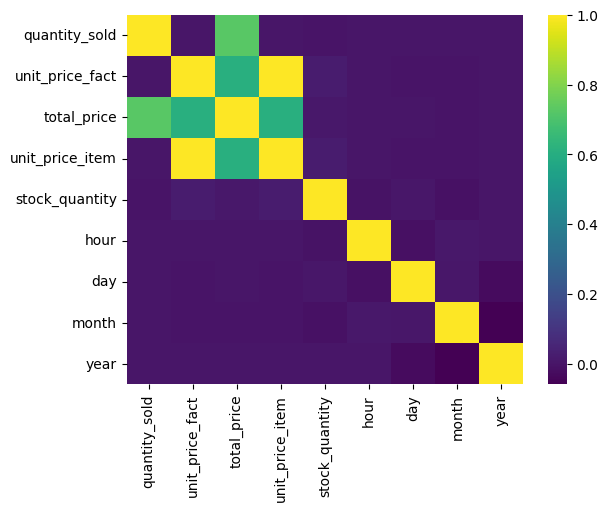

In [16]:
sns.heatmap(merge_sheet.corr(method='pearson', min_periods=1, numeric_only=True), cmap = 'viridis')

There are good correlation between sold quantity, unit price and total price only

#Statistics Summary

  ------------------------------------------------------------------------------

In [17]:
merge_sheet[['quantity_sold','unit_price_fact','total_price']].describe()

,quantity_sold,unit_price_fact,total_price
count,100000.000000,100000.000000,100000.000000
mean,5.994920,16.959788,101.651012
std,3.162659,7.491110,73.814819
min,1.000000,6.000000,6.000000
25%,3.000000,14.000000,48.000000
50%,6.000000,15.000000,90.000000
75%,9.000000,18.000000,140.000000
max,11.000000,55.000000,605.000000


**Quantity**: The average Quantity figure was 5.99. The minimum recorded quantity was 1, and the maximum was 11, with the middle value (median) being 6. The quantity data shows a standard deviation of 3.1.

**Unit Price**: The average Unit Price was 16.95. The minimum recorded Unit Price was 6, and the maximum was 55, with the middle value (median) being 15. The Unit Price data shows a standard deviation of 7.49.

**Total Price**: The average total Price was 101.65. The minimum recorded Total Price was 6, and the maximum was 605, with the middle value (median) being 90. The Total Price data shows a standard deviation of 73.81.

There are no null value

#Visualizing the total Sales by Store

  ------------------------------------------------------------------------------

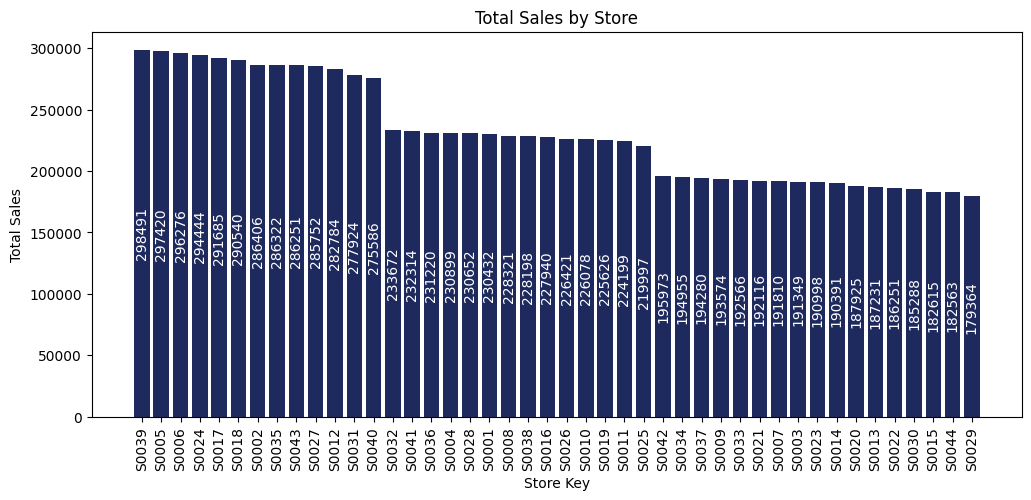

In [18]:
total_sales_by_store = merge_sheet.groupby('store_key')['total_price'].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 5))
plt.bar(total_sales_by_store.index, total_sales_by_store.values,color='#1E2A5E')
plt.xlabel('Store Key')
plt.ylabel('Total Sales')
plt.title('Total Sales by Store')
plt.xticks(rotation=90)
plt.bar_label(plt.gca().containers[0],rotation=90,label_type='center',color='white')
plt.show()

From above graph, finding the location of highest revenue store

In [19]:
S0039_store_location = merge_sheet.query("store_key=='S0039'")["division_store"].drop_duplicates()
S0039_store_location

,division_store
7982,Chittagong


From above graph, finding the location of my assign store

In [20]:
S0001_store_location = merge_sheet.query("store_key=='S0001'")["division_store"].drop_duplicates()
S0001_store_location

,division_store
2869,Dhaka


From above chart shows the total sales by store, where my assign store (S0001) is 19th position out of 44, located in Dhaka and top most one in Chittagong

#Visualizing the total Sales by Area (Store division)

  ------------------------------------------------------------------------------

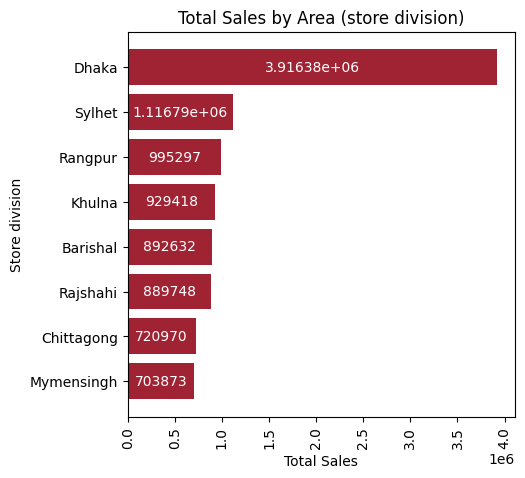

In [21]:
total_sales_by_store_division = merge_sheet.groupby('division_store')['total_price'].sum().sort_values(ascending=True)
plt.figure(figsize=(5, 5))
plt.barh(total_sales_by_store_division.index, total_sales_by_store_division.values,color='#A02334')
plt.xlabel('Total Sales')
plt.ylabel('Store division')
plt.title('Total Sales by Area (store division)')
plt.xticks(rotation=90)
plt.bar_label(plt.gca().containers[0],label_type='center',color='white')
plt.show()

Dhaka is the most significant sales area and, other location moderately close,ranging from about 0.9 million to 0.7 million, mymensingh is the lowest sales division

#Visualizing the total number of Store by Location (Store division)

  ------------------------------------------------------------------------------

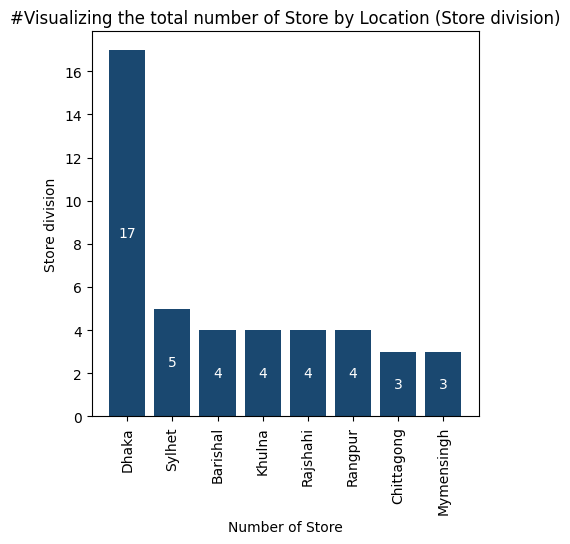

In [22]:
total_count_by_store_division = merge_sheet.groupby('division_store')['store_key'].nunique().sort_values(ascending=False)
plt.figure(figsize=(5, 5))
plt.bar(total_count_by_store_division.index, total_count_by_store_division.values,color='#1A4870')
plt.xlabel('Number of Store')
plt.ylabel('Store division')
plt.title('#Visualizing the total number of Store by Location (Store division)')
plt.xticks(rotation=90)
plt.bar_label(plt.gca().containers[0],label_type='center',color='white')
plt.show()

Most of the store (17) in dhaka division and other between 5 to 3 out of 44

#Visualizing the total Sales by Item

  ------------------------------------------------------------------------------

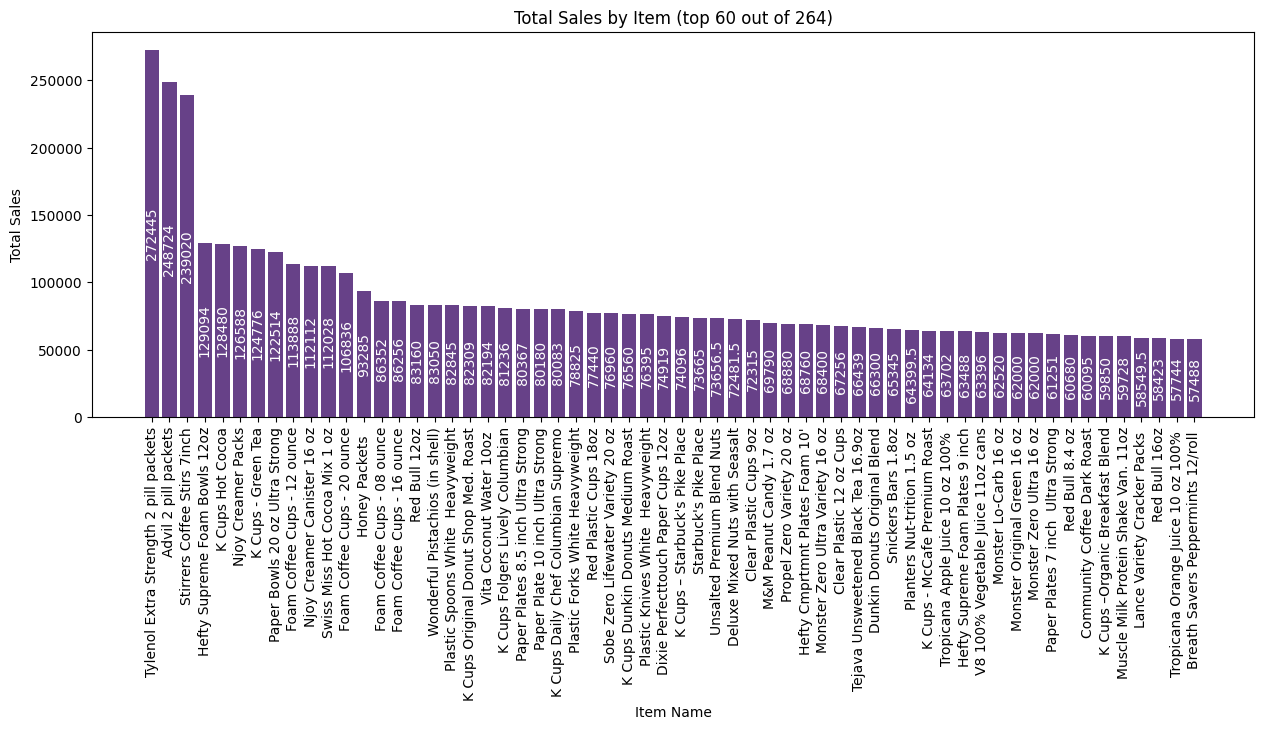

In [23]:
total_sales_by_item = merge_sheet.groupby('item_name')['total_price'].sum().nlargest(60).sort_values(ascending=False)
plt.figure(figsize=(15, 5))
plt.bar(total_sales_by_item.index, total_sales_by_item.values,color='#674188')
plt.xlabel('Item Name')
plt.ylabel('Total Sales')
plt.title('Total Sales by Item (top 60 out of 264)')
plt.xticks(rotation=90)
plt.bar_label(plt.gca().containers[0],rotation=90,label_type='center',color='white')
plt.show()

From above graph, finding the highest item type

In [24]:
item_key_type = merge_sheet.query("item_name=='Tylenol Extra Strength 2 pill packets'")[["item_key","item_type"]].drop_duplicates()
item_key_type

,item_key,item_type
0,I00264,Medicine


From above graph, finding my assign item type

In [25]:
I00151_item = merge_sheet.query("item_key=='I00151'")[["item_name","item_type"]].drop_duplicates()
I00151_item

,item_name,item_type
2301,Cheetos Flamin' Hot 1 oz,Food - Chips


In [26]:
I00085_item = merge_sheet.query("item_key=='I00085'")[["item_name","item_type"]].drop_duplicates()
I00085_item

,item_name,item_type
14,Tropicana Orange Juice 10 oz 100%,Beverage - Juice


Finding sales value my assign item

In [27]:
I00151_item_sales = merge_sheet.query("item_key=='I00151'")['total_price'].sum()
I00151_item_sales

18734.0

In [28]:
I00085_item_sales = merge_sheet.query("item_key=='I00085'")['total_price'].sum()
I00085_item_sales

57744.0

The most sales Item name is "Tylenol Extra Strength 2 pill packets",

Actualy this is a Medicine, it's vary necessary item

where my assign item name are "Cheetos Flamin' Hot 1 oz" and "Tropicana Orange Juice 10 oz 100%",

these are food and beverage item

#Visualizing the total Sales by Item type

  ------------------------------------------------------------------------------

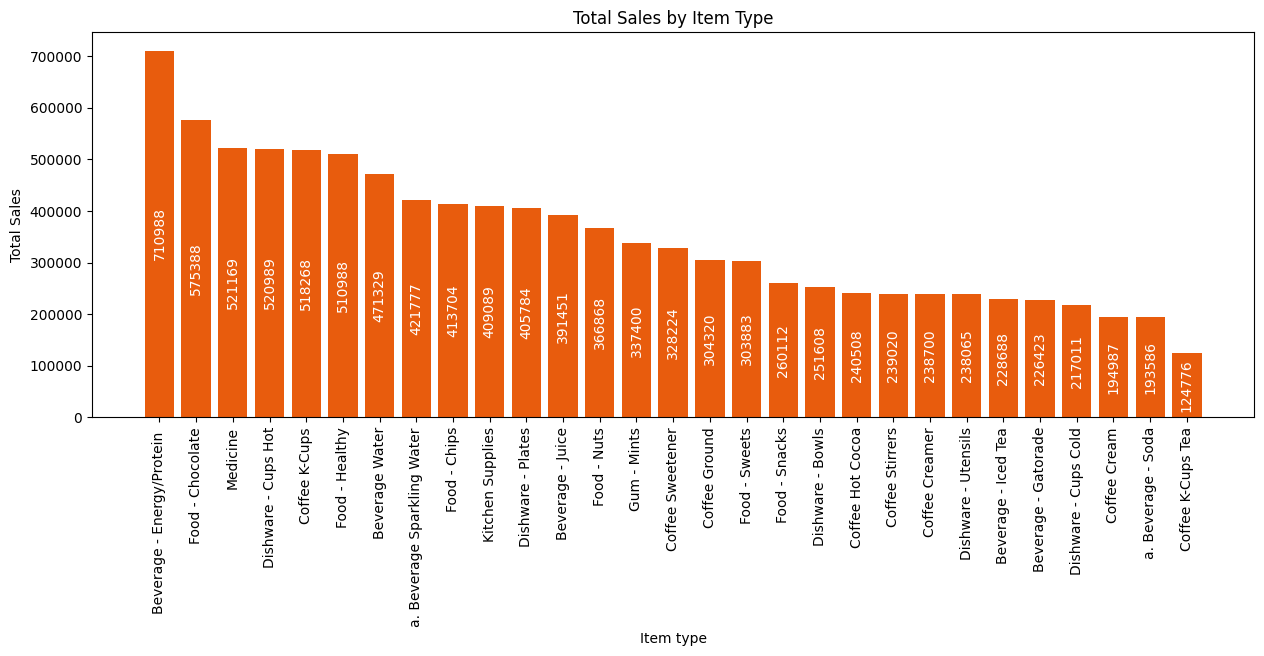

In [29]:
total_sales_by_item_type = merge_sheet.groupby('item_type')['total_price'].sum().sort_values(ascending=False)
plt.figure(figsize=(15, 5))
plt.bar(total_sales_by_item_type.index, total_sales_by_item_type.values,color='#E85C0D')
plt.xlabel('Item type')
plt.ylabel('Total Sales')
plt.title('Total Sales by Item Type')
plt.xticks(rotation=90)
plt.bar_label(plt.gca().containers[0],rotation=90,label_type='center',color='white')
plt.show()

#Visualizing the total Quantity Sold by Item

  ------------------------------------------------------------------------------

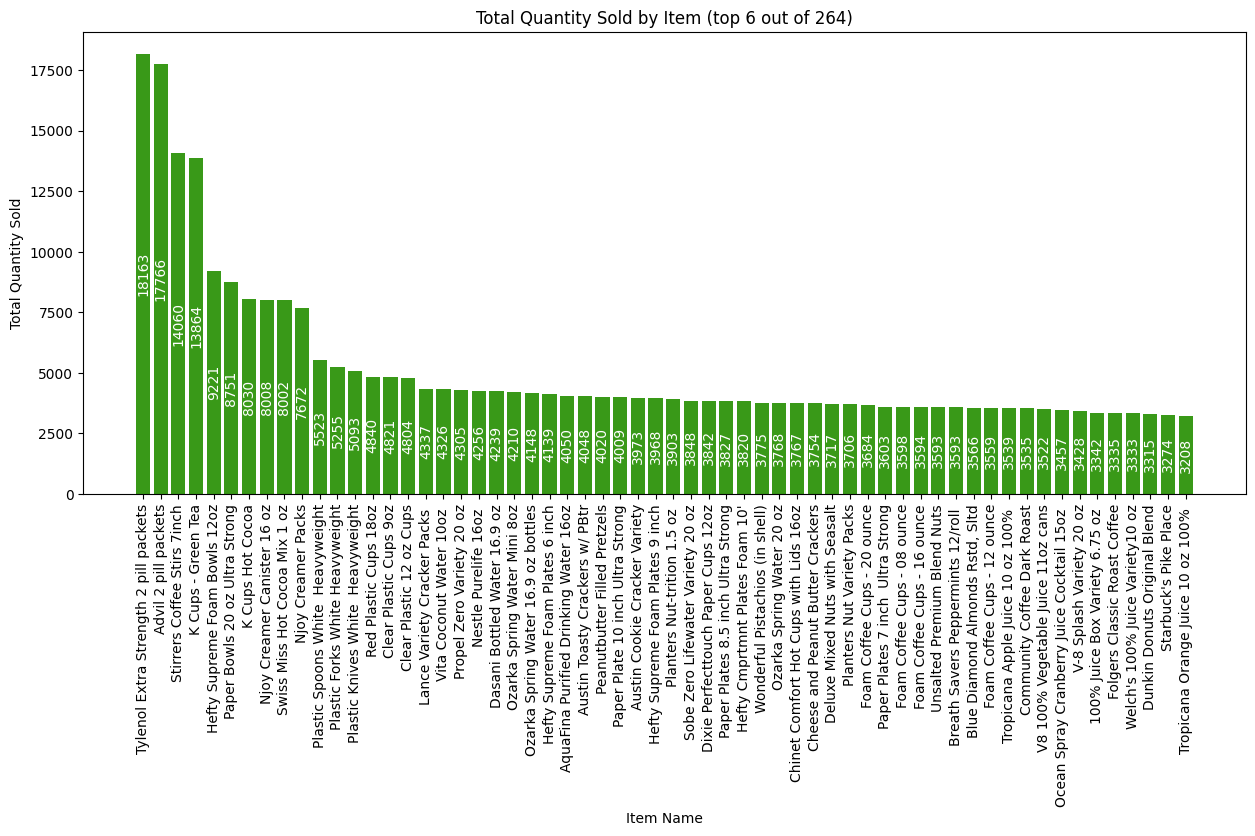

In [30]:
total_quantity_sold_by_item = merge_sheet.groupby('item_name')['quantity_sold'].sum().nlargest(60).sort_values(ascending=False)
plt.figure(figsize=(15, 6))
plt.bar(total_quantity_sold_by_item.index, total_quantity_sold_by_item.values,color='#399918')
plt.xlabel('Item Name')
plt.ylabel('Total Quantity Sold')
plt.title('Total Quantity Sold by Item (top 6 out of 264)')
plt.xticks(rotation=90)
plt.bar_label(plt.gca().containers[0],rotation=90,label_type='center',color='white')
plt.show()

Finding quantity sold my assign item

In [31]:
I00151_item_sales = merge_sheet.query("item_key=='I00151'")['quantity_sold'].sum()
I00151_item_sales

1102

In [32]:
I00085_item_sales = merge_sheet.query("item_key=='I00085'")['quantity_sold'].sum()
I00085_item_sales

3208

My assign item quantity "Cheetos Flamin' Hot 1 oz" was 1102 and "Tropicana Orange Juice 10 oz 100%" was 3208

We already saw The most sales Item "Tylenol Extra Strength 2 pill packets", Quantity also most was 18163


#Visualizing the Number of Transaction by Payment Type

  ------------------------------------------------------------------------------

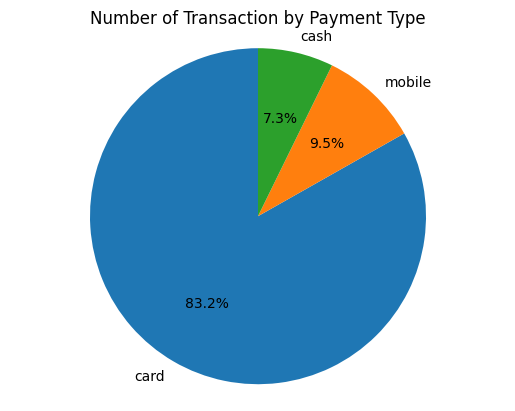

In [33]:
total_number_of_tran_by_trans_type = merge_sheet.groupby('trans_type').size().sort_values(ascending=False)
fig, ax = plt.subplots()
ax.pie(total_number_of_tran_by_trans_type.values, labels=total_number_of_tran_by_trans_type.index,autopct='%1.1f%%',startangle=90)
ax.axis('equal')
plt.title('Number of Transaction by Payment Type')
plt.show()

Most of the transaction was by using card, only 7.3% using cash, we want to increase other transaction type, we can some offer using those type transaction

#Visualizing the Number of Customer by Locaton (Customer division)

  ------------------------------------------------------------------------------

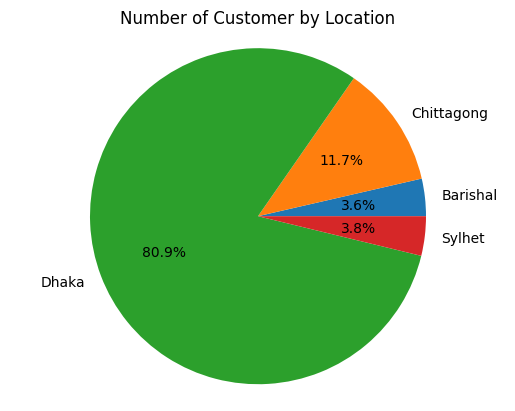

In [34]:
total_number_of_costomer_by_location = merge_sheet.groupby('division_customer').size()
fig, ax = plt.subplots()
ax.pie(total_number_of_costomer_by_location.values, labels=total_number_of_costomer_by_location.index,autopct='%1.1f%%',startangle=0)
ax.axis('equal')
plt.title('Number of Customer by Location')
plt.show()

The most of the customer saty in dhaka, there are no customer in khulna, Rajshahi, Rangpur and Mymensingh, so we can atracting new customer those area giving some offer discount

#Visualizing the total Sales by Year



  ------------------------------------------------------------------------------

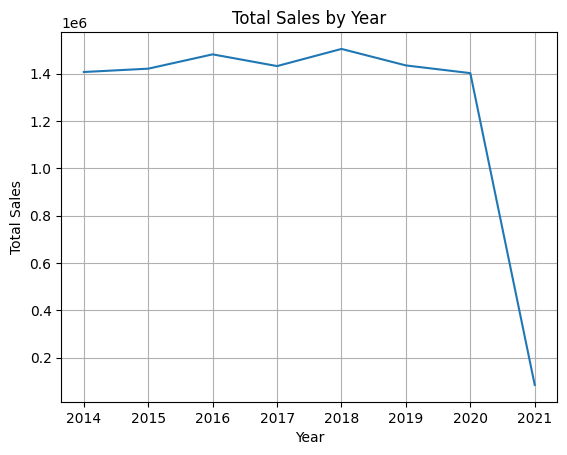

In [35]:
total_sales_by_year = merge_sheet.groupby('year')['total_price'].sum()
plt.plot(total_sales_by_year.index, total_sales_by_year.values)
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.title('Total Sales by Year')
plt.grid(True)
plt.show()

Sales were relatively consistent from 2014 to 2020, ranging from about 1.4 million to 1.5 million.
The year 2018 saw the highest total sales, with approximately 1.5 million.
There’s a significant drop in 2021, likely due to incomplete data

#Visualizing the total Sales by Quarter

  ------------------------------------------------------------------------------

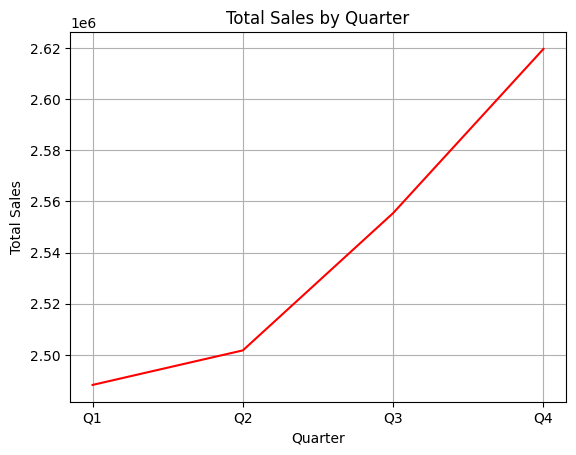

In [36]:
total_sales_by_quarter = merge_sheet.groupby('quarter')['total_price'].sum()
plt.plot(total_sales_by_quarter.index, total_sales_by_quarter.values,color='red')
plt.xlabel('Quarter')
plt.ylabel('Total Sales')
plt.title('Total Sales by Quarter')
plt.grid(True)
plt.show()

Sales show dramatic fluctuations across quarters, with no single quarter consistently outperforming others across years.
Q4 generally tends to have higher sales

#Visualizing the total Sales by Month

  ------------------------------------------------------------------------------

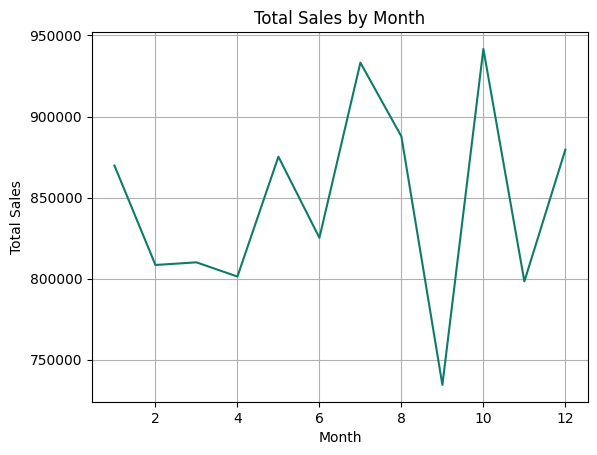

In [37]:
total_sales_by_month = merge_sheet.groupby('month')['total_price'].sum()
plt.plot(total_sales_by_month.index, total_sales_by_month.values,color='#0D7C66')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Total Sales by Month')
plt.grid(True)
plt.show()

Sales vary month to month with no consistent pattern across years, september is lowest and october is highest

#Visualizing the total Sales by Week day

  ------------------------------------------------------------------------------

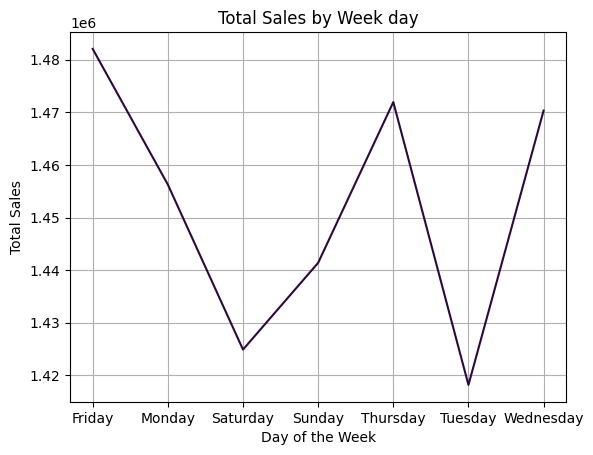

In [38]:
merge_sheet['date'] = pd.to_datetime(merge_sheet['date'], format='%d-%m-%Y %H:%M')
total_sales_by_day = merge_sheet.groupby(merge_sheet['date'].dt.day_name())['total_price'].sum()
plt.plot(total_sales_by_day.index, total_sales_by_day.values,color='#2E073F')
plt.xlabel('Day of the Week')
plt.ylabel('Total Sales')
plt.title('Total Sales by Week day')
plt.grid(True)
plt.show()

Friday having the highest sales and Tuesday the lowest over the week

#Visualizing the Total Sales by Date of month

  ------------------------------------------------------------------------------

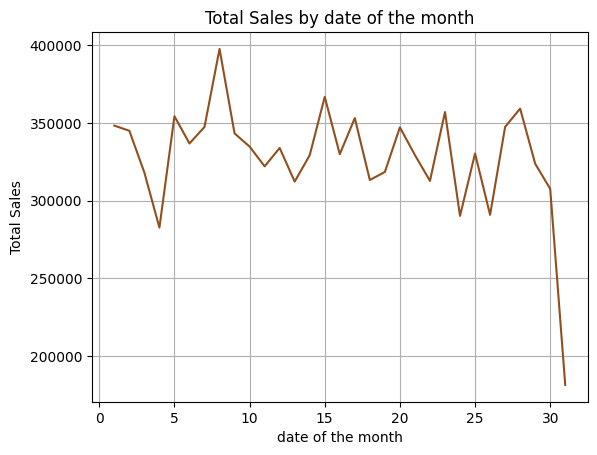

In [39]:
total_sales_by_day = merge_sheet.groupby(['day'])['total_price'].sum()
plt.plot(total_sales_by_day.index, total_sales_by_day.values,color='#914F1E')
plt.xlabel('date of the month')
plt.ylabel('Total Sales')
plt.title('Total Sales by date of the month')
plt.grid(True)
plt.show()

In date of 8 is highest and end ofthe month is lowest

#Visualizing the Total Sales by Location (Customer vs Store, division)

  ------------------------------------------------------------------------------

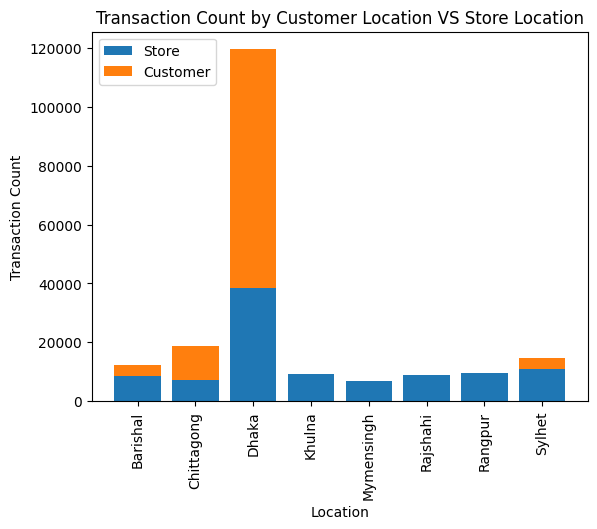

In [40]:
total_trans_count_by_store_division = merge_sheet.groupby(['division_store'])['total_price'].count()
total_trans_count_by_customer_division = merge_sheet.groupby(['division_customer'])['total_price'].count()
total_trans_count_by_division = pd.concat([total_trans_count_by_store_division, total_trans_count_by_customer_division], axis=1)
total_trans_count_by_division.columns = ['Store', 'Customer']
plt.bar(total_trans_count_by_division.index, total_trans_count_by_division['Store'], label='Store')
plt.bar(total_trans_count_by_division.index, total_trans_count_by_division['Customer'], label='Customer', bottom=total_trans_count_by_division['Store'])
plt.xlabel('Location')
plt.ylabel('Transaction Count')
plt.title('Transaction Count by Customer Location VS Store Location')
plt.legend()
plt.xticks(rotation=90)
plt.show()

Most of the customer location in Dhaka but Compared to that, the number of transaction was more less, so, need to new store open in dhaka, No customer was located in Khulna, Mymensingh, Rajshahi and Rangpur but transaction was happend,in these area, need to discount to increase sales, Barishal and Sylhet were good transaction compare to customer, Chittagong was less transaction compare to customer

#Visualizing the Total Sales by Store Size

  ------------------------------------------------------------------------------

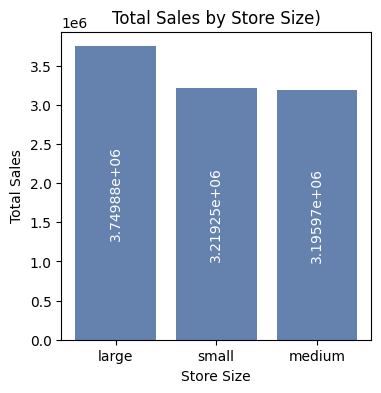

In [41]:
total_sales_by_store_size = merge_sheet.groupby(['store_size'])['total_price'].sum().sort_values(ascending=False)
plt.figure(figsize=(4, 4))
plt.bar(total_sales_by_store_size.index, total_sales_by_store_size.values,color='#6482AD')
plt.xlabel('Store Size')
plt.ylabel('Total Sales')
plt.title('Total Sales by Store Size)')
plt.bar_label(plt.gca().containers[0],label_type='center',color='white',rotation=90)
plt.show()

Sales dosn't matter small and medium size store, when we will open new store, it's size may be either large or small

#Regression Analysis (Single)

  ------------------------------------------------------------------------------

What is the unit price for what quantity?


In [42]:
df_regression = merge_sheet[['quantity_sold','unit_price_fact']]
df_regression.shape

(100000, 2)

<Axes: xlabel='quantity_sold', ylabel='unit_price_fact'>

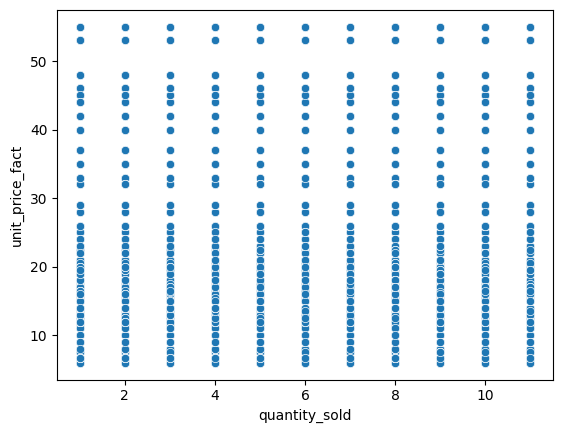

In [43]:
sns.scatterplot(x='quantity_sold', y='unit_price_fact', data=df_regression)

In above chart, Linear regression is not suitable for unit price and quantity

Try to another

What is the total price for what quantity?

In [44]:
df_regression = merge_sheet[['quantity_sold','total_price']]
df_regression.shape

(100000, 2)

<Axes: xlabel='quantity_sold', ylabel='total_price'>

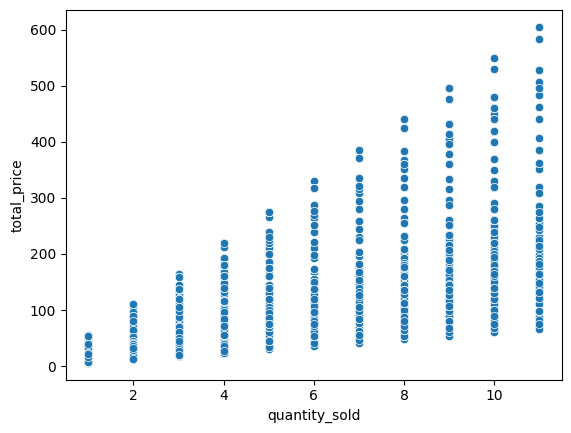

In [45]:
sns.scatterplot(x='quantity_sold', y='total_price', data=df_regression)

In above chart, Linear regression is not good but can be done

Separate independent variable (X) and dependent variable (y)

In [46]:
X = df_regression.drop(['quantity_sold'], axis=1)
y = df_regression['quantity_sold']

Splite train and test data

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=123)

In [48]:
X.shape

(100000, 1)

In [49]:
X_train.shape

(80000, 1)

Fit the linear Regrassion model

In [50]:
LRModel = LinearRegression()
LRModel.fit(X_train, y_train)

LinearRegression()

Find the coefficient and intercept

In [51]:
LRModel.coef_

array([0.0311955])

In [52]:
LRModel.intercept_

2.82221209482206

Prediction

In [53]:
ypred = LRModel.predict(X_test)

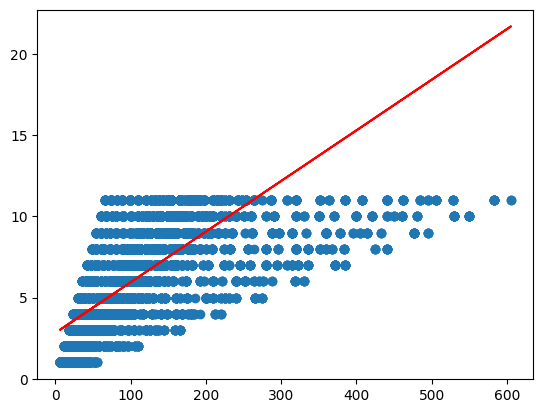

In [54]:
plt.plot(X_test, ypred, color='r');
plt.scatter(X_test, y_test);

Check the score

In [55]:
def eval(model, X_train, y_train, X_test, y_test):
    print("The training score is,", model.score(X_train, y_train), end='\n')
    print("The testing score is,", model.score(X_test, y_test))

In [56]:
def metric_score(y_test, ypred):
    print("The mean absolute error is: ", mean_absolute_error(y_test, ypred))
    print("The mean squared error is: ", mean_squared_error(y_test, ypred))
    print("The R2 score is: ", r2_score(y_test, ypred))

In [57]:
eval(LRModel, X_train, y_train, X_test, y_test)

The training score is, 0.5291144541003205
The testing score is, 0.523314645428322


In [58]:
metric_score(y_test, ypred)

The mean absolute error is:  1.7393709081052169
The mean squared error is:  4.763543860906032
The R2 score is:  0.523314645428322


The score More than this does not seem possible

#Regression Analysis (Multiple)

  ------------------------------------------------------------------------------

What is the total price for what quantity and unit price?

In [59]:
df_regression_multi = merge_sheet[['unit_price_fact','quantity_sold','total_price']]
df_regression_multi.shape

(100000, 3)

<Axes: xlabel='unit_price_fact', ylabel='total_price'>

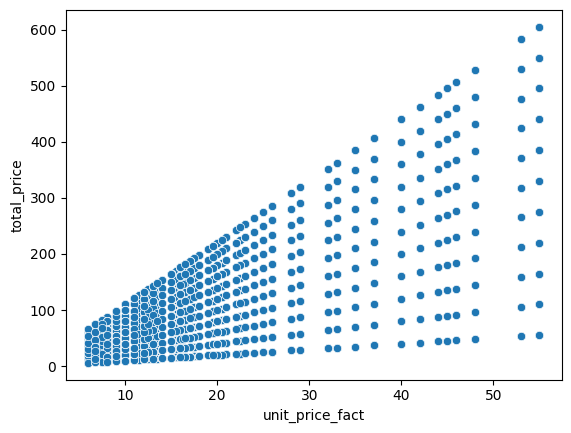

In [60]:
sns.scatterplot(x='unit_price_fact', y='total_price', data=df_regression_multi)

<Axes: xlabel='quantity_sold', ylabel='total_price'>

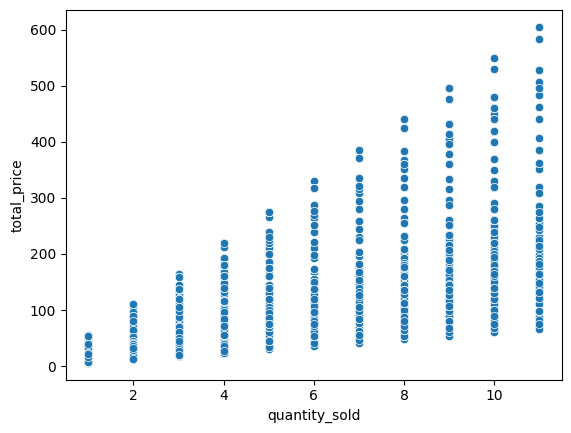

In [61]:
sns.scatterplot(x='quantity_sold', y='total_price', data=df_regression_multi)

In above charts, Linear regression is not good but can be done

Separate independent variable (X) and dependent variable (y)

In [62]:
X = df_regression_multi.drop(['total_price'], axis=1)
y = df_regression_multi['total_price']

Splite train and test data

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=123)

Fit the linear Regrassion model

In [64]:
LRModel.fit(X_train, y_train)

LinearRegression()

Find the coefficient and intercept

In [65]:
LRModel.coef_

array([ 5.96983604, 16.99229713])

In [66]:
LRModel.intercept_

-101.49386986203646

Prediction

In [67]:
ypred = LRModel.predict(X_test)
ypred

array([ 81.96991046,  63.82711731, 146.95418095, ..., 118.93942274,
       205.26876032,  -0.92386815])

Check the score

In [68]:
eval(LRModel, X_train, y_train, X_test, y_test)

The training score is, 0.8968953487595867
The testing score is, 0.8989669280047047


In [69]:
metric_score(y_test, LRModel.predict(X_test))

The mean absolute error is:  12.914884052962313
The mean squared error is:  554.1206700081109
The R2 score is:  0.8989669280047047


Try to better score using regularization

#Lasso (L1) Regularization

  ------------------------------------------------------------------------------

In [70]:
LassoModel = Lasso()
LassoModel.fit(X_train, y_train);
LassoModel.score(X_test, y_test)

0.8989489317622602

In [71]:
eval(LassoModel, X_train, y_train, X_test, y_test)

The training score is, 0.8968736641536041
The testing score is, 0.8989489317622602


In [72]:
metric_score(y_test, LassoModel.predict(X_test))

The mean absolute error is:  12.844036833479315
The mean squared error is:  554.2193712524071
The R2 score is:  0.8989489317622602


Score not increased

#Ridge (L2) Regularization

  ------------------------------------------------------------------------------

In [73]:
RidgeModel = Ridge(alpha=10)
RidgeModel.fit(X_train, y_train)
RidgeModel.score(X_test, y_test)

0.8989669824558875

In [74]:
eval(RidgeModel, X_train, y_train, X_test, y_test)

The training score is, 0.8968953486748091
The testing score is, 0.8989669824558875


In [75]:
metric_score(y_test, RidgeModel.predict(X_test))

The mean absolute error is:  12.914681399171927
The mean squared error is:  554.1203713680195
The R2 score is:  0.8989669824558875


Still score is same

#ElasticNet (hybrid) Regularization

  ------------------------------------------------------------------------------

In [76]:
ENModel = ElasticNet()
ENModel.fit(X_train, y_train)
ENModel.score(X_test, y_test)

0.8977928199155799

In [77]:
eval(ENModel, X_train, y_train, X_test, y_test)

The training score is, 0.8955063796625867
The testing score is, 0.8977928199155799


In [78]:
metric_score(y_test, ENModel.predict(X_test))

The mean absolute error is:  12.32594182037552
The mean squared error is:  560.5601214487051
The R2 score is:  0.8977928199155799


The score More than this does not possible

#Classification analysis

  ------------------------------------------------------------------------------

In [79]:
threshold = np.percentile(merge_sheet['total_price'], 75)
merge_sheet['new_store_open_status'] = (merge_sheet['total_price'] > threshold).astype(int)

features = ['division_store', 'store_size', 'trans_type', 'item_type', 'unit_price_fact', 'quantity_sold']
X = merge_sheet[features]
y = merge_sheet['new_store_open_status']

label_encoders = {}
for column in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column])
    label_encoders[column] = le


scaler = StandardScaler()
X[['unit_price_fact', 'quantity_sold']] = scaler.fit_transform(X[['unit_price_fact', 'quantity_sold']])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((80000, 6), (20000, 6), (80000,), (20000,))

In [80]:
log_reg = LogisticRegression(random_state=42)
decision_tree = DecisionTreeClassifier(random_state=42)
random_forest = RandomForestClassifier(random_state=42)
svm = SVC(random_state=42)

log_reg.fit(X_train, y_train)
decision_tree.fit(X_train, y_train)
random_forest.fit(X_train, y_train)
svm.fit(X_train, y_train)

y_pred_log_reg = log_reg.predict(X_test)
y_pred_decision_tree = decision_tree.predict(X_test)
y_pred_random_forest = random_forest.predict(X_test)
y_pred_svm = svm.predict(X_test)

def evaluate_model(y_test, y_pred):
    return {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred)
    }

results = {
    'Logistic Regression': evaluate_model(y_test, y_pred_log_reg),
    'Decision Tree': evaluate_model(y_test, y_pred_decision_tree),
    'Random Forest': evaluate_model(y_test, y_pred_random_forest),
    'SVM': evaluate_model(y_test, y_pred_svm)
}

results

{'Logistic Regression': {'Accuracy': 0.9427,
  'Precision': 0.87912558936991,
  'Recall': 0.8757472245943638,
  'F1 Score': 0.8774331550802138},
 'Decision Tree': {'Accuracy': 1.0,
  'Precision': 1.0,
  'Recall': 1.0,
  'F1 Score': 1.0},
 'Random Forest': {'Accuracy': 1.0,
  'Precision': 1.0,
  'Recall': 1.0,
  'F1 Score': 1.0},
 'SVM': {'Accuracy': 0.96775,
  'Precision': 0.9308726264134841,
  'Recall': 0.931468830059778,
  'F1 Score': 0.9311706328033293}}

Random Forest and Decision Tre performed the best with an accuracy of 100%,

Logistic Regression and SVM also performed reasonably well but with slightly lower scores.

Based on these results, Random Forest seems to be the most effective model for predicting the success of a new store based on the available features.

#Time series analysis

  ------------------------------------------------------------------------------

Separate time related data and sales data

In [81]:
df_time_analysis = merge_sheet[['date','year','month','total_price']]
df_time_analysis

,date,year,month,total_price
0,2016-07-11 13:18:00,2016,7,15.0
1,2020-08-03 09:16:00,2020,8,30.0
2,2014-02-03 20:01:00,2014,2,105.0
3,2014-11-18 18:13:00,2014,11,105.0
4,2014-05-16 12:59:00,2014,5,72.0
...,...,...,...,...
99995,2020-01-01 22:45:00,2020,1,148.5
99996,2019-10-23 22:11:00,2019,10,136.0
99997,2016-10-25 02:16:00,2016,10,56.0
99998,2016-10-25 02:16:00,2016,10,67.5


Prepare date data for month wise aggregation

In [82]:
df_time_analysis['date'] = pd.to_datetime(dict(year=df_time_analysis.year, month=df_time_analysis.month, day=1))
df_time_analysis

,date,year,month,total_price
0,2016-07-01,2016,7,15.0
1,2020-08-01,2020,8,30.0
2,2014-02-01,2014,2,105.0
3,2014-11-01,2014,11,105.0
4,2014-05-01,2014,5,72.0
...,...,...,...,...
99995,2020-01-01,2020,1,148.5
99996,2019-10-01,2019,10,136.0
99997,2016-10-01,2016,10,56.0
99998,2016-10-01,2016,10,67.5


In [83]:
df_time_analysis = df_time_analysis[['date','total_price']]
df_time_analysis

,date,total_price
0,2016-07-01,15.0
1,2020-08-01,30.0
2,2014-02-01,105.0
3,2014-11-01,105.0
4,2014-05-01,72.0
...,...,...
99995,2020-01-01,148.5
99996,2019-10-01,136.0
99997,2016-10-01,56.0
99998,2016-10-01,67.5


Check data type

In [84]:
df_time_analysis.dtypes

,0
date,datetime64[ns]
total_price,float64


In time series analysis, need to data sorted first

In [85]:
df_time_analysis.sort_values(by=['date'], inplace=True)
df_time_analysis

,date,total_price
47790,2014-01-01,60.0
86054,2014-01-01,60.0
62143,2014-01-01,154.0
86020,2014-01-01,16.5
30365,2014-01-01,45.0
...,...,...
66060,2021-01-01,140.0
66061,2021-01-01,136.0
6586,2021-01-01,220.0
38846,2021-01-01,192.0


Month wise grouping over the years

In [86]:
df_time_analysis= df_time_analysis.groupby('date')['total_price'].sum()
df_time_analysis

,total_price
date,
2014-01-01,38514.50
2014-02-01,121872.00
2014-03-01,127090.25
2014-04-01,117236.00
2014-05-01,138108.50
...,...
2020-09-01,85501.25
2020-10-01,112351.25
2020-11-01,111075.00


Convert series to datafram

In [87]:
df_time_analysis = pd.DataFrame({'date':df_time_analysis.index, 'total_price':df_time_analysis.values})
df_time_analysis

,date,total_price
0,2014-01-01,38514.50
1,2014-02-01,121872.00
2,2014-03-01,127090.25
3,2014-04-01,117236.00
4,2014-05-01,138108.50
...,...,...
80,2020-09-01,85501.25
81,2020-10-01,112351.25
82,2020-11-01,111075.00
83,2020-12-01,124124.50


Set index column

In [88]:
df_time_analysis.set_index(['date'], inplace=True)
df_time_analysis.head()

,total_price
date,
2014-01-01,38514.50
2014-02-01,121872.00
2014-03-01,127090.25
2014-04-01,117236.00
2014-05-01,138108.50


#Visualizing sales over the time

  ------------------------------------------------------------------------------

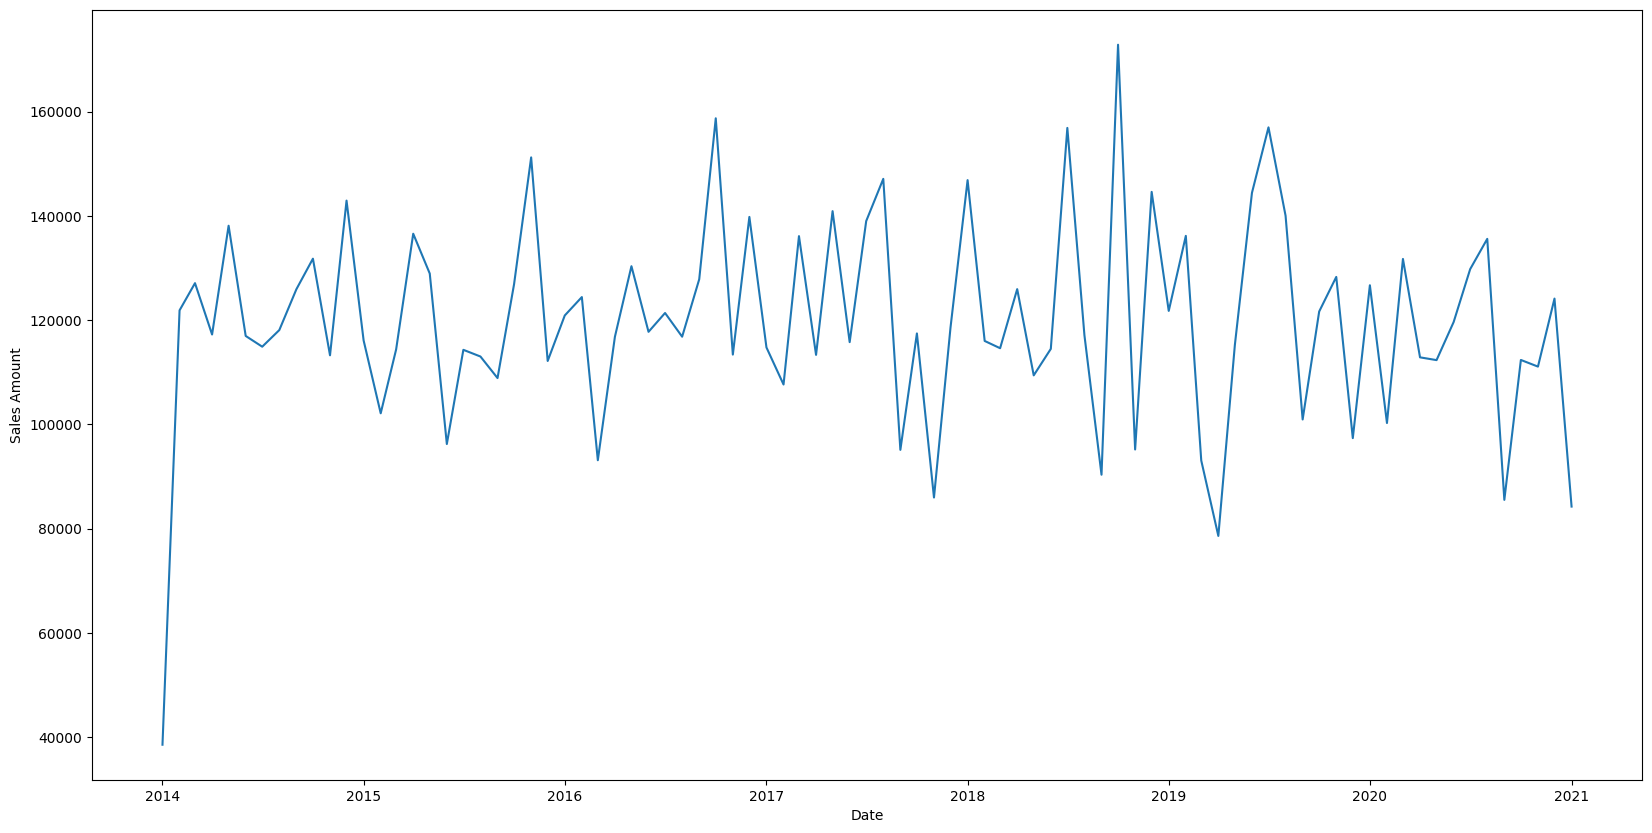

In [89]:
plt.figure(figsize=(20,10))
plt.xlabel("Date")
plt.ylabel("Sales Amount")
plt.plot(df_time_analysis)

In [90]:
test_result = adfuller(df_time_analysis['total_price'])
test_result

(-11.197964558024589,
 2.2812987515567612e-20,
 0,
 84,
 {'1%': -3.510711795769895,
  '5%': -2.8966159448223734,
  '10%': -2.5854823866213152},
 1626.1796097959489)

The line plot above shows the total sales trend over time, aggregated by month and year. It has noise patterns that means random variation in the series.

#Statistical testing (ADF and KPSS) or find the value of d

  ------------------------------------------------------------------------------

In [91]:
def adfuller_test(data):
    result = adfuller(data)
    labels = ['ADF Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used']
    for value, label in zip(result, labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [92]:
adfuller_test(df_time_analysis['total_price'])

ADF Test Statistic : -11.197964558024589
p-value : 2.2812987515567612e-20
#Lags Used : 0
Number of Observations Used : 84
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [93]:
def kpss_test(timeseries):
    print("Results of KPSS Test:")
    kpsstest = kpss(timeseries, regression="c")
    kpss_output = pd.Series(
        kpsstest[0:3], index=["Test Statistic", "p-value", "Lags Used"]
    )
    for key, value in kpsstest[3].items():
        kpss_output["Critical Value (%s)" % key] = value
    print(kpss_output)

    if (kpss_output['p-value'] < 0.05):
        print("The time series is not stationary")
    else:
        print("The time series is stationary")

In [94]:
kpss_test(df_time_analysis['total_price'])

Results of KPSS Test:
Test Statistic           0.127643
p-value                  0.100000
Lags Used                4.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64
The time series is stationary


<ipython-input-93-318061b5ca86>:3: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpsstest = kpss(timeseries, regression="c")


Since data is stationary, so d is 0

#Find the value for p and q

  ------------------------------------------------------------------------------

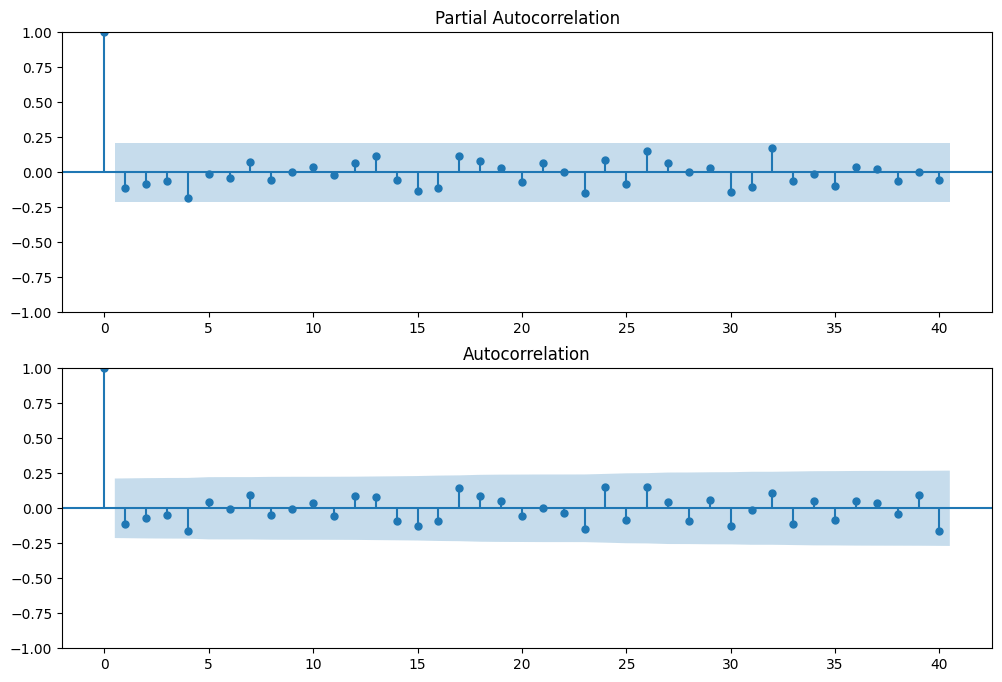

In [95]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_pacf(df_time_analysis['total_price'].dropna(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_acf(df_time_analysis['total_price'].dropna(), lags=40, ax=ax2)

From above chart p and q both are 1

#Time Series Models:ARIMA

  ------------------------------------------------------------------------------

In [96]:
model = ARIMA(df_time_analysis['total_price'], order=(1, 1, 0))
model_fit = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [97]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            total_price   No. Observations:                   85
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -973.564
Date:                Fri, 06 Sep 2024   AIC                           1951.127
Time:                        13:12:46   BIC                           1955.989
Sample:                    01-01-2014   HQIC                          1953.082
                         - 01-01-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4131      0.070     -5.902      0.000      -0.550      -0.276
sigma2      5.576e+08   3.32e-11   1.68e+19      0.000    5.58e+08    5.58e+08
===================================================================================
Ljung-Box (L1) (Q):                   1.86   Jarque-Bera (JB):                13.36
Prob(Q):                              0.17   Prob(JB):                         0.00
Heteroskedasticity (H):               1.10   Skew:                             0.59
Prob(H) (two-sided):                  0.81   Kurtosis:                         4.56
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number    inf. Standard errors may be unstable.
"""

In [98]:
df_time_analysis.shape

(85, 1)

#Forecast the sales over the actual

  ------------------------------------------------------------------------------

In [99]:
df_time_analysis['forecast'] = model_fit.predict(start=70, end=85)

<Axes: xlabel='date'>

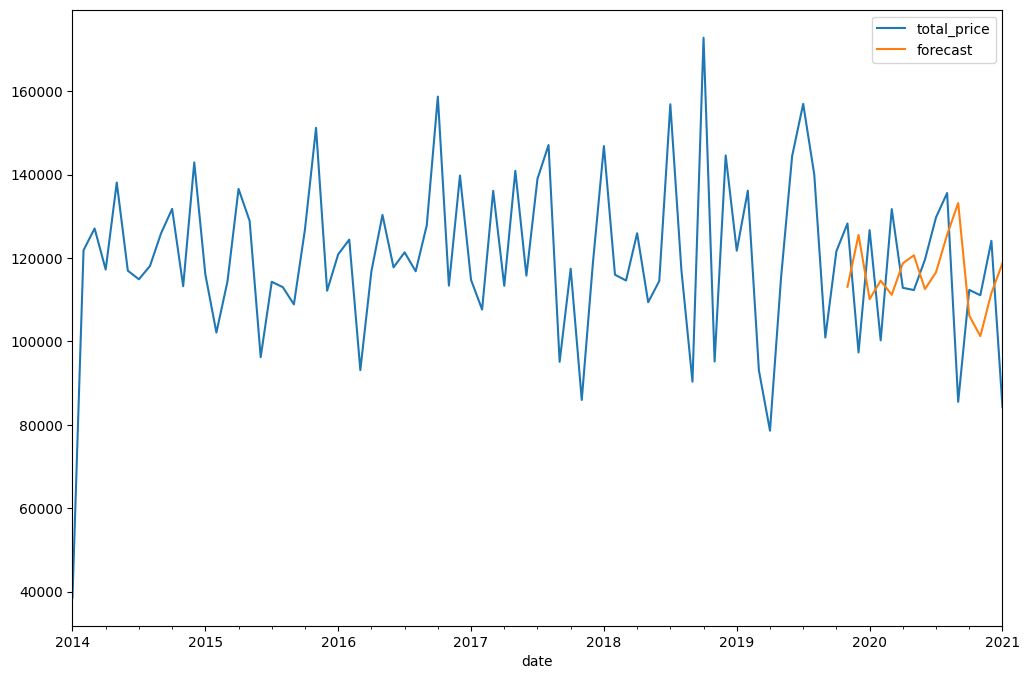

In [100]:
df_time_analysis[['total_price','forecast']].plot(figsize=(12,8))

#Generating future date

  ------------------------------------------------------------------------------

In [101]:
future_dates=[df_time_analysis.index[-1]+ DateOffset(months=x) for x in range(0, 13)]
future_dates

[Timestamp('2021-01-01 00:00:00'),
 Timestamp('2021-02-01 00:00:00'),
 Timestamp('2021-03-01 00:00:00'),
 Timestamp('2021-04-01 00:00:00'),
 Timestamp('2021-05-01 00:00:00'),
 Timestamp('2021-06-01 00:00:00'),
 Timestamp('2021-07-01 00:00:00'),
 Timestamp('2021-08-01 00:00:00'),
 Timestamp('2021-09-01 00:00:00'),
 Timestamp('2021-10-01 00:00:00'),
 Timestamp('2021-11-01 00:00:00'),
 Timestamp('2021-12-01 00:00:00'),
 Timestamp('2022-01-01 00:00:00')]

In [102]:
future_data_df=pd.DataFrame(index=future_dates[1:], columns=df_time_analysis.columns)

In [103]:
future_data_df.head()

,total_price,forecast
2021-02-01,NaN,NaN
2021-03-01,NaN,NaN
2021-04-01,NaN,NaN
2021-05-01,NaN,NaN
2021-06-01,NaN,NaN


In [104]:
future_df = pd.concat([df_time_analysis, future_data_df])

In [105]:
future_df.tail(18)

,total_price,forecast
2020-08-01,135590.00,125586.364241
2020-09-01,85501.25,133190.271211
2020-10-01,112351.25,106194.960148
2020-11-01,111075.00,101258.417428
2020-12-01,124124.50,111602.271045
2021-01-01,84213.50,118733.218114
2021-02-01,NaN,NaN
2021-03-01,NaN,NaN
2021-04-01,NaN,NaN
2021-05-01,NaN,NaN


#Forecast the future sales

  ------------------------------------------------------------------------------

<Axes: >

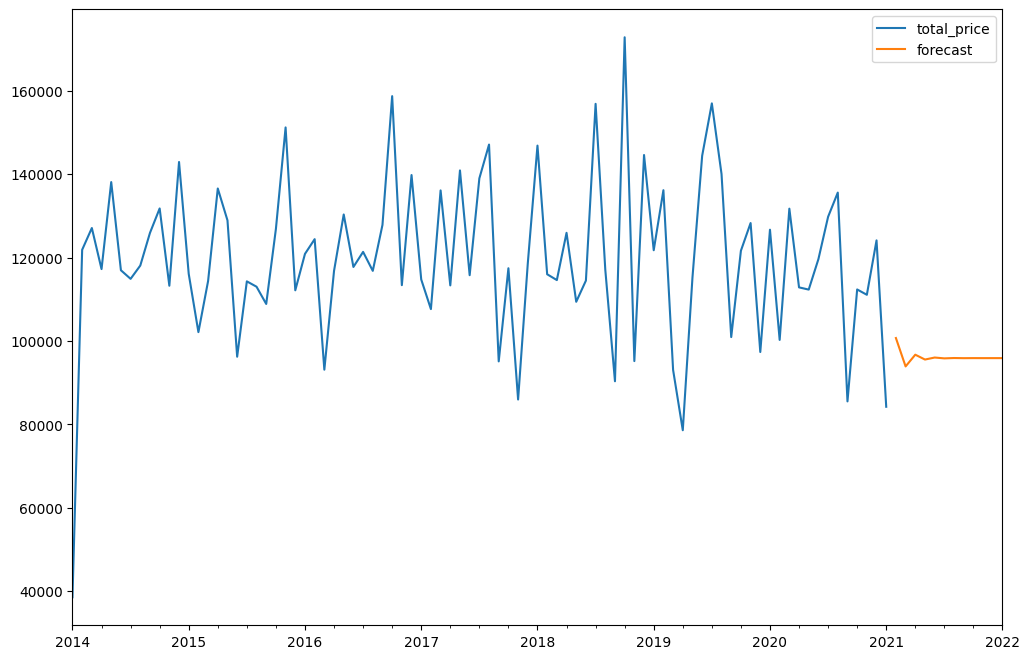

In [106]:
future_df['forecast'] = model_fit.forecast(steps=18)
future_df[['total_price','forecast']].plot(figsize=(12,8))

This prediction may be better using SARIMA

#Time Series Models: SARIMA

  ------------------------------------------------------------------------------

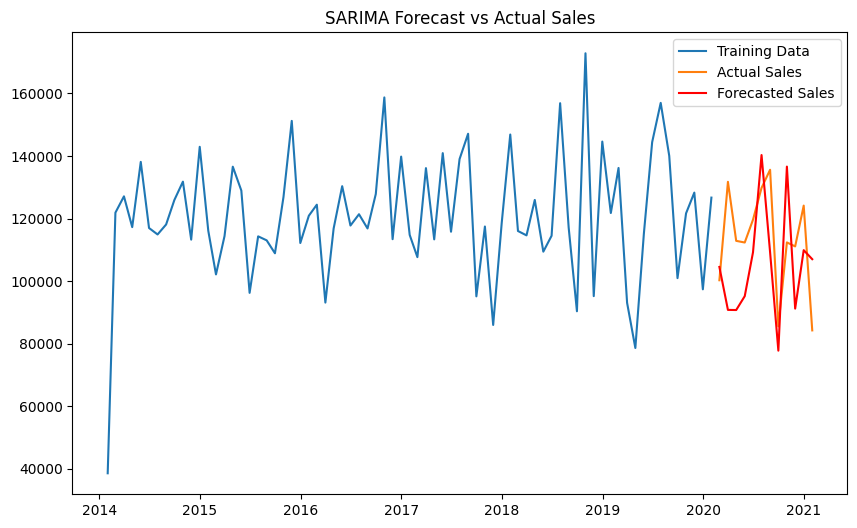

In [107]:

monthly_sales = merge_sheet.groupby(pd.Grouper(key='date', freq='M'))['total_price'].sum()


train_data = monthly_sales[:-12]
test_data = monthly_sales[-12:]

sarima_model = SARIMAX(train_data,
                       order=(1, 1, 0),
                       seasonal_order=(1, 1, 0, 12),
                       enforce_stationarity=False,
                       enforce_invertibility=False)

sarima_fit = sarima_model.fit(disp=False)


forecast = sarima_fit.forecast(steps=12)

plt.figure(figsize=(10, 6))
plt.plot(train_data.index, train_data, label='Training Data')
plt.plot(test_data.index, test_data, label='Actual Sales')
plt.plot(test_data.index, forecast, label='Forecasted Sales', color='red')
plt.title('SARIMA Forecast vs Actual Sales')
plt.legend()
plt.show()

The plot is showing how well the model forecasts compared to actual sales data over the time.

#Evaluate the Model

  ------------------------------------------------------------------------------

In [108]:
rmse = np.sqrt(mean_squared_error(test_data, forecast))
print(f'Root Mean Squared Error: {rmse:.2f}')

Root Mean Squared Error: 20740.59


In [109]:
print(sarima_fit.summary())

                                     SARIMAX Results                                      
Dep. Variable:                        total_price   No. Observations:                   73
Model:             SARIMAX(1, 1, 0)x(1, 1, 0, 12)   Log Likelihood                -548.270
Date:                            Fri, 06 Sep 2024   AIC                           1102.540
Time:                                    13:12:48   BIC                           1108.090
Sample:                                01-31-2014   HQIC                          1104.628
                                     - 01-31-2020                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4185      0.173     -2.415      0.016      -0.758      -0.079
ar.S.L12      -0.6175      0.190   

#Recommendations

  ------------------------------------------------------------------------------
1. Most of the store (17) in dhaka and other area between 5 to 3 out of 44. we can open new store out side Dhaka
2. Most of the transaction (83.2%) was by using card, 7.3% using cash and 9.5% mobile, we want to increase other transaction type, we can give some offers or  discounts using those type transaction
3. Most of the customer (80.9%) in dhaka, there are no customer in khulna, Rajshahi, Rangpur and Mymensingh, so we can atracting new customer those area giving some offer discount
4. The sales at the beginning of the year are quite low compared to the end of the year so we can give some offers or discounts at the beginning 1st and 2nd quarter
5. Saturday and Tuesday are less sales, we can give some offers or discounts those days
6. To reduce the cost of opening a new store, we can open the small size store because small or medium size store's sales are same
7. Random Forest seems to be the most effective model for predicting the success of a new store based on the available features.
9. SARIMA is better in time series analysis according to pattern